# Kaggle - House price competition

In [2]:
# to print all outputs in a cell instead of just the last one 
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = 'all'  # 'last_expr'  

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = 16, 10
#%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# to display all columns of DF
pd.set_option('display.max_columns', None)

In [3]:
#read the dataset
data_train = pd.read_csv('./input/train.csv', index_col='Id')
data_submission = pd.read_csv('./input/test.csv', index_col='Id')

# Exploratory Data Analysis

## Description of the dataset

In [4]:
print('Dataset = {:d} observations x {:d} features (including target)'.format(data_train.shape[0], data_train.shape[1]))
data_train.sample(5)

Dataset = 1460 observations x 80 features (including target)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
237,20,RL,65.0,8773,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,98.0,Gd,TA,PConc,Gd,TA,Av,GLQ,24,Unf,0,1390,1414,GasA,Ex,Y,SBrkr,1414,0,0,1414,0,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2004.0,RFn,2,494,TA,TA,Y,132,105,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,185500
1332,80,RL,55.0,10780,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,SLvl,5,5,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Av,ALQ,483,Unf,0,428,911,GasA,Gd,Y,SBrkr,954,0,0,954,0,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1976.0,Unf,2,576,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,132500
1427,60,RL,81.0,10944,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1994,1994,Gable,CompShg,VinylSd,VinylSd,BrkFace,448.0,Gd,TA,PConc,Gd,TA,No,GLQ,1000,Unf,0,223,1223,GasA,Ex,Y,SBrkr,1223,904,0,2127,1,0,2,1,3,1,Gd,5,Typ,2,TA,Attchd,1994.0,RFn,2,525,TA,TA,Y,171,132,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal,271000
518,60,RL,79.0,10208,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,921.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1264,1264,GasA,Ex,Y,SBrkr,1277,1067,0,2344,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,1996.0,RFn,3,889,TA,TA,Y,220,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,265000
471,120,RL,NaN,6820,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1985,1985,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,368,BLQ,1120,0,1488,GasA,TA,Y,SBrkr,1502,0,0,1502,1,0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,1985.0,RFn,2,528,TA,TA,Y,0,54,0,0,140,0,NaN,NaN,NaN,0,6,2010,WD,Normal,212000


In [5]:
# computing basic statistics 
summary = pd.DataFrame(np.array([data_train.dtypes, 
                                 data_train.isnull().sum(), 
                                 data_train.isnull().sum() / data_train.shape[0] * 100, 
                                 data_train.nunique()]),
                       index=['Dtype', 'NullValuesCount', 'NullValuesPct', 'NbrUniqVal'],
                       columns=np.array(list(data_train)))

display(summary)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Dtype,int64,object,float64,int64,object,object,object,object,object,object,object,object,object,object,object,object,int64,int64,int64,int64,object,object,object,object,object,float64,object,object,object,object,object,object,object,int64,object,int64,int64,int64,object,object,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object,int64,object,int64,object,object,float64,object,int64,int64,object,object,object,int64,int64,int64,int64,int64,int64,object,object,object,int64,int64,int64,object,object,int64
NullValuesCount,0,0,259,0,0,1369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,0,0,0,37,37,38,37,0,38,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,690,81,81,81,0,0,81,81,0,0,0,0,0,0,0,1453,1179,1406,0,0,0,0,0,0
NullValuesPct,0,0,17.7397,0,0,93.7671,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.547945,0.547945,0,0,0,2.53425,2.53425,2.60274,2.53425,0,2.60274,0,0,0,0,0,0,0.0684932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47.2603,5.54795,5.54795,5.54795,0,0,5.54795,5.54795,0,0,0,0,0,0,0,99.5205,80.7534,96.3014,0,0,0,0,0,0
NbrUniqVal,15,5,110,1073,2,2,4,4,2,5,3,25,9,8,5,8,10,9,112,61,6,8,15,16,4,327,4,5,6,4,4,4,6,637,6,144,780,721,6,5,2,5,753,417,24,861,4,3,4,3,8,4,4,12,7,4,5,6,97,3,5,441,5,5,3,274,202,120,20,76,8,3,4,4,21,12,5,9,6,663


### Removing outliers
The link in the Acknowledgments section of [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques "House Prices: Advanced Regression Techniques") web site contains the following information on the dataset:  
*There are five observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will quickly indicate these points). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these five unusual observations) before assigning it to students.*  
I followed this advice and removed observations with *GrLivArea* above 4000. 

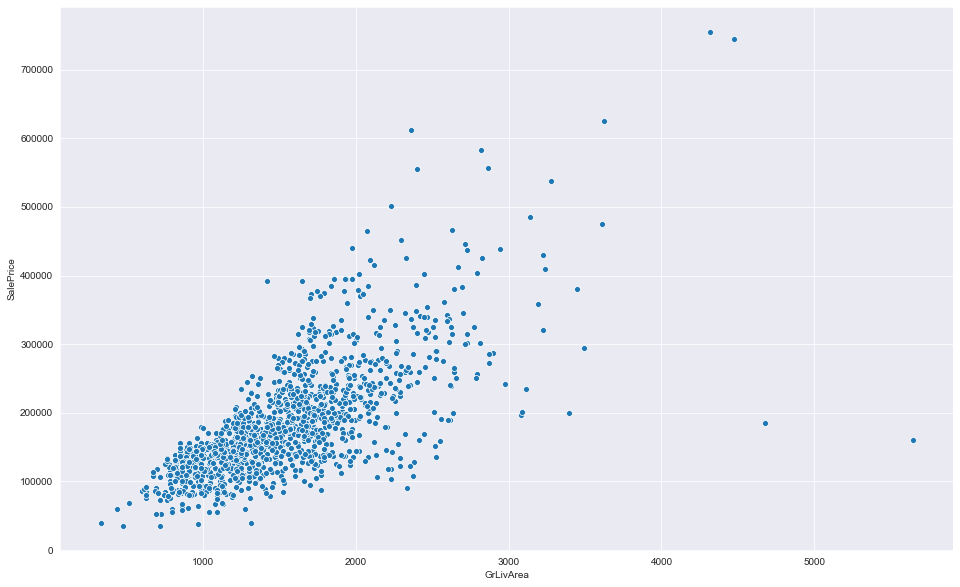

In [6]:
sns.scatterplot(x=data_train.GrLivArea, y=data_train.SalePrice);
data_train = data_train[data_train.GrLivArea < 4000]

## Transforming the target
We see that the target variable is positively skewed.  
We use a **log transform to remove skew and normalize the target variable**. This is also more in accordance with a multiplicative model (ie a model where a given feature add x% to the price rather than a constant sum y USD)

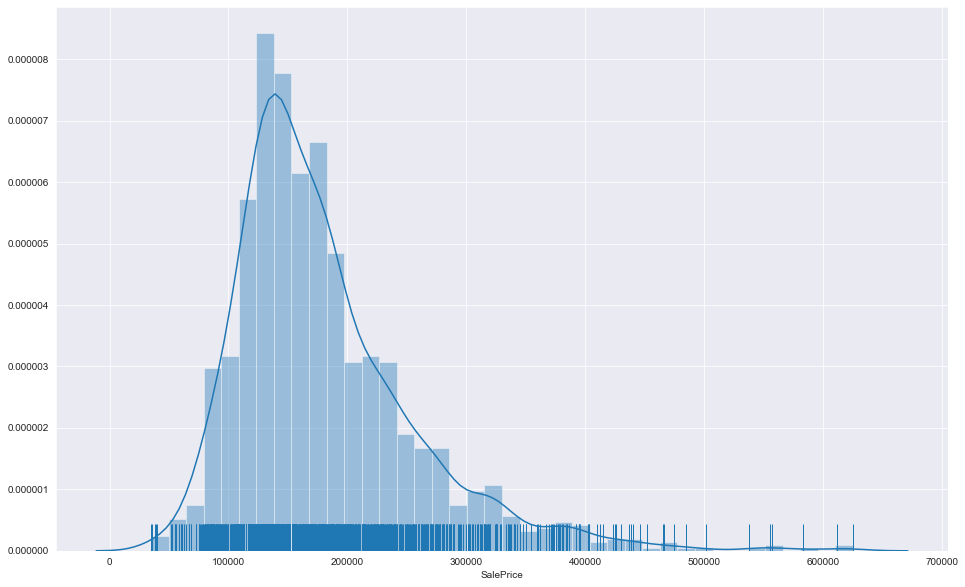

In [7]:
sns.distplot(data_train.SalePrice, rug=True);

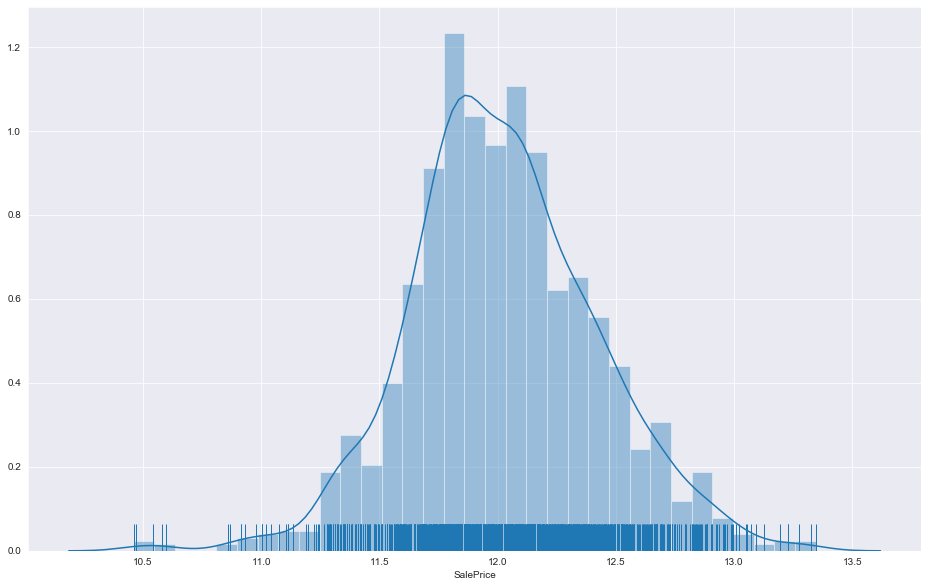

In [8]:
sns.distplot(np.log(data_train.SalePrice), rug=True);

## Numerical features

In [9]:
train_numeric = data_train.select_dtypes(include=[np.number])
print('Total of numerical plus ordinal features (including target) = {:d}'.format(train_numeric.shape[1]))
train_numeric.sample(5)

features_cont = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
                '3SsnPorch', 'ScreenPorch', 'PoolArea']
features_disc = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']
features_time = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']
features_ord = ['OverallQual', 'OverallCond']
features_nom = ['MSSubClass']
label = ['SalePrice']

Total of numerical plus ordinal features (including target) = 37


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1416,120,51.0,3635,7,5,2007,2007,130.0,988,0,398,1386,1569,0,0,1569,0,1,2,0,1,1,7,1,2007.0,3,660,143,20,0,0,0,0,0,5,2009,175900
99,30,85.0,10625,5,5,1920,1950,0.0,108,0,350,458,835,0,0,835,0,0,1,0,2,1,5,0,1920.0,1,366,0,0,77,0,0,0,400,5,2010,83000
348,20,NaN,17600,6,5,1960,1960,30.0,1270,0,208,1478,1478,0,0,1478,1,0,2,0,3,1,6,2,1960.0,2,498,0,40,0,0,0,0,0,12,2009,157500
90,20,60.0,8070,4,5,1994,1995,0.0,588,0,402,990,990,0,0,990,1,0,1,0,3,1,5,0,NaN,0,0,0,0,0,0,0,0,0,8,2007,123600
283,120,34.0,5063,7,5,2007,2008,166.0,904,0,410,1314,1314,0,0,1314,1,0,2,0,2,1,6,1,2008.0,2,626,172,62,0,0,0,0,0,4,2009,207500


### Correlation with target - continuous features
I plot first correlation of continuous features with the target and the log of the target.  
Both exhibit the same level of correlation with the features.  
Features showing the highest corelation are *GrLivArea* (0.72), *TotalBsmtSF*, *GarageArea* and *1stFlrSF* (0.65 to 0.63), then *MasVnrArea* (0.48). 
The 3 following features have low correlation with the target and propbably be discarded *BsmtFinSF2*, *LowQualFinSF*, *PoolArea*.   

I will keep the feature *MiscVal* in spite of its low correlation. This is the *Value of miscellaneous feature*, and as such, I will substract it from the Sale Price to get a new target. 

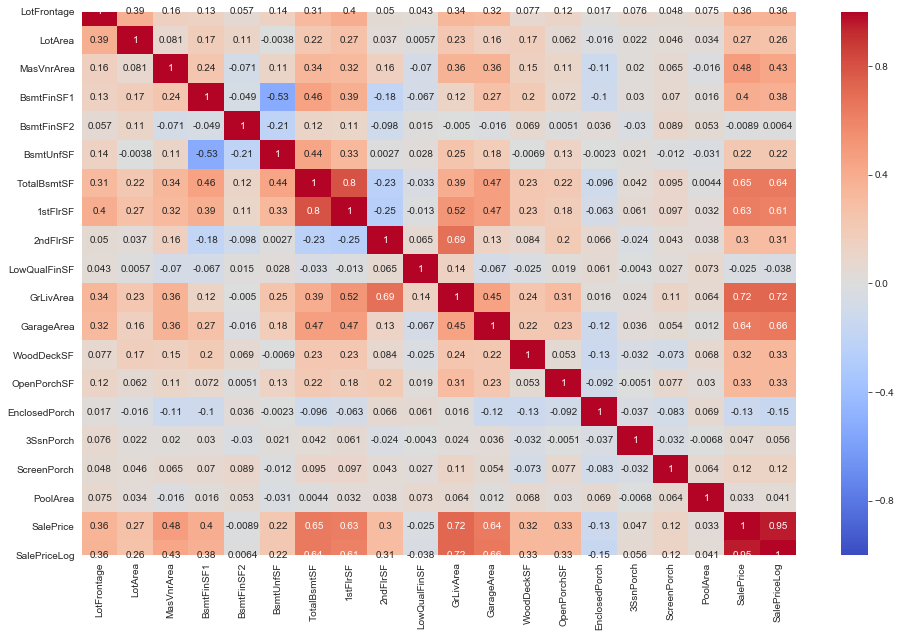

In [10]:
df_corr = train_numeric[features_cont + label].copy()
df_corr['SalePriceLog'] = np.log(df_corr['SalePrice']) 
corr = df_corr.corr()
sns.heatmap(corr, vmin=-1, cmap='coolwarm',annot=True);

### Correlation with target - discrete features

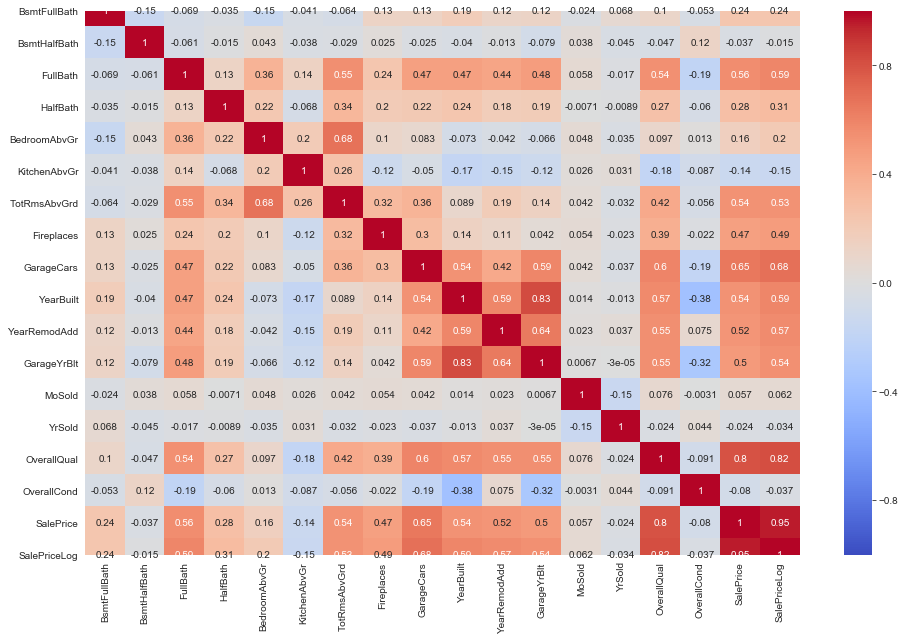

In [11]:
df_corr = train_numeric[features_disc + features_time + features_ord + label].copy()
df_corr['SalePriceLog'] = np.log(df_corr['SalePrice']) 
corr = df_corr.corr()
sns.heatmap(corr, vmin=-1, cmap='coolwarm',annot=True);

Plot of target versus *OverallQual* shows that value 1 and 2 are equivalent: we will map 2 to 1 to improve the linear correlation.

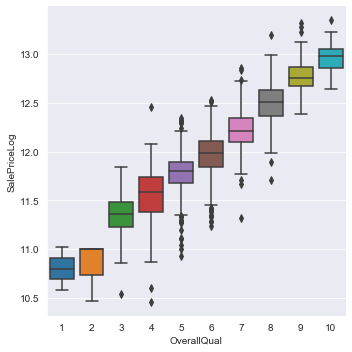

In [12]:
sns.catplot(x='OverallQual', y='SalePriceLog', data=df_corr, kind='box');

Plot of target versus *OverallCond* shows that value 1 is very unfrequent, and that values above 5 do not improve price. We will map 1 to 2, and all values above 5 to 5.

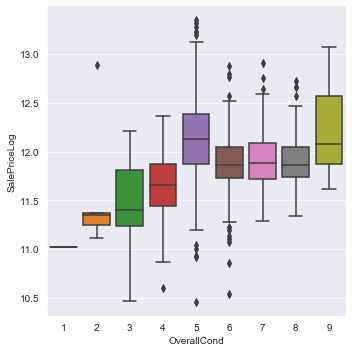

In [13]:
sns.catplot(x='OverallCond', y='SalePriceLog', data=df_corr, kind='box');

## Categorical features

In [14]:
train_cat = data_train.select_dtypes(exclude=[np.number])
train_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### Binary features
Feature *Alley* has missing values: it will be transformed to dummy features after filling NA values. 
Feature *Utilities* will be transformed to numeric binary variable by converting value *AllPub* to 1 and all other values to 0. 

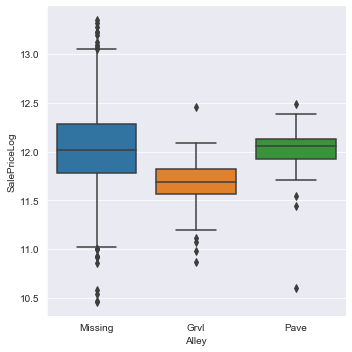

In [15]:
features_bin = ['Street', 'Alley', 'Utilities', 'CentralAir']
features_nom = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
                'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 
                'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 
                'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 
                'SaleType', 'SaleCondition']

df = data_train[features_nom + features_bin + label].copy()
df['SalePriceLog'] = np.log(df['SalePrice']) 
df.fillna(value='Missing', inplace=True)

sns.catplot(x='Alley', y='SalePriceLog', data=df, kind='box');

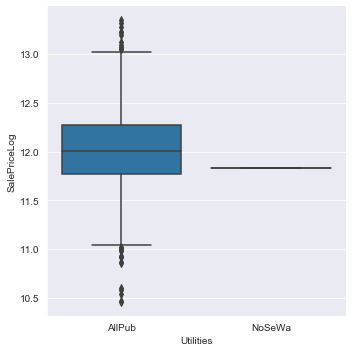

In [16]:
sns.catplot(x='Utilities', y='SalePriceLog', data=df, kind='box');

## Feature Engineering

In [17]:
def feature_engineering(data):
    df = data.copy()

    # numerical features
    df['OverallQual'] = df['OverallQual'].apply(lambda x: 1 if x == 2 else x)   
    df['OverallCond'] = df['BsmtQual'].map({1:2, 2:2, 3:3, 4:4, 5:5, 6:5, 7:5, 8:5, 9:5, 10:5})    
    df = pd.get_dummies(data=df, columns=['MoSold'], drop_first=True) 
    # dropping time features because of instability
    df.drop(['YrSold','YearRemodAdd', 'GarageYrBlt'], axis=1, inplace=True)

    # drop numerical features with low correlation
    df.drop(['BsmtFinSF2', 'LowQualFinSF', '3SsnPorch', 'PoolArea', 'BsmtHalfBath'], axis=1, inplace=True)
    
    # binary features
    df['Street'] = df['Street'].map({'Grvl':0, 'Pave':1})
    df['CentralAir'] = df['CentralAir'].map({'N':0, 'Y':1})
    df['Alley'].fillna(value='Missing', inplace=True)
    df = pd.get_dummies(data=df, columns=['Alley'], drop_first=True) 

    # mapping ordinal features
    df['ExterQual'] = df['ExterQual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df['ExterCond'] = df['ExterCond'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df['BsmtQual'] = df['BsmtQual'].map({np.NaN:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df['BsmtCond'] = df['BsmtCond'].map({np.NaN:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df['BsmtExposure'] = df['BsmtExposure'].map({np.NaN:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df['HeatingQC'] = df['HeatingQC'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df['KitchenQual'] = df['KitchenQual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df['FireplaceQu'] = df['FireplaceQu'].map({np.NaN:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df['GarageQual'] = df['GarageQual'].map({np.NaN:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df['GarageCond'] = df['GarageCond'].map({np.NaN:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df['PoolQC'] = df['PoolQC'].map({np.NaN:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})       
    
    # dropping other categorical features because of instability  
    df.drop(['Neighborhood', 'LotConfig', 'MSZoning', 'Foundation', 'Functional', 'Condition1', 'RoofStyle'], axis=1, inplace=True)     
    df.drop(['LotShape', 'LandContour', 'LandSlope', 'BldgType', 'GarageType', 'GarageFinish', 'PavedDrive', 
                'SaleType', 'SaleCondition'], axis=1, inplace=True)   
    df.drop(['RoofMatl','BsmtFinType1', 'BsmtFinType2', 'Condition2', 'Exterior1st', 'HouseStyle',
             'Exterior2nd', 'MasVnrType', 'Fence', 'Heating', 'Electrical',], axis=1, inplace=True)    
    
    # drop others
    df.drop(['MSSubClass', 'MiscFeature', 'MiscVal'], axis=1, inplace=True)
    
    # Other categorical features
    df['Utilities'] = df['Utilities'].apply(lambda x: 1 if x == 'AllPub' else 0)
    
    # we need to check if target is present before dropping it, otherwise submission set will raise an error
    if 'SalePrice' in list(df):
        df.drop(['SalePrice'], axis=1, inplace=True)
    
    return df

X_fe = feature_engineering(data_train)
X_fe.head()

,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,Alley_Missing,Alley_Pave
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,1,1,7,NaN,2003,196.0,4,3,4,3,NaN,706,150,856,5,1,856,854,1710,1,2,1,3,1,4,8,0,0,2,548,3,3,0,61,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,80.0,9600,1,1,6,NaN,1976,0.0,3,3,4,3,4.0,978,284,1262,5,1,1262,0,1262,0,2,0,3,1,3,6,1,3,2,460,3,3,298,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,68.0,11250,1,1,7,NaN,2001,162.0,4,3,4,3,NaN,486,434,920,5,1,920,866,1786,1,2,1,3,1,4,6,1,3,2,608,3,3,0,42,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,60.0,9550,1,1,7,NaN,1915,0.0,3,3,3,4,NaN,216,540,756,4,1,961,756,1717,1,1,0,3,1,4,7,1,4,3,642,3,3,0,35,272,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
5,84.0,14260,1,1,8,NaN,2000,350.0,4,3,4,3,NaN,655,490,1145,5,1,1145,1053,2198,1,2,1,4,1,4,9,1,3,3,836,3,3,192,84,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


### Linear regression

metric = 0.1349 +/- 0.0064
metric on training set = 0.1283
Linear Regression - score on validation data = 0.8800
metric on training set = 0.1309


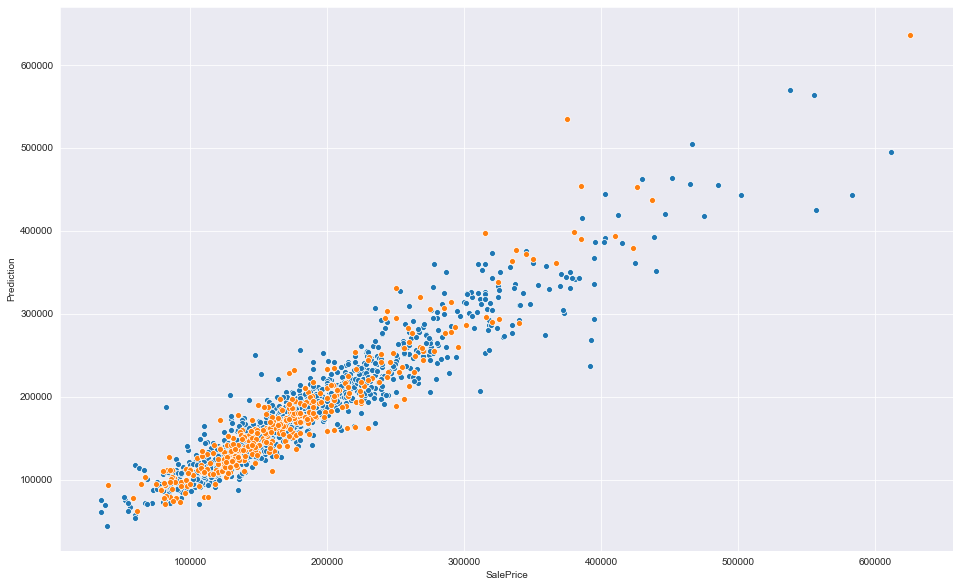

In [18]:
X_fe = feature_engineering(data_train)
X_train, X_test, y_train, y_test = train_test_split(X_fe, np.log(data_train[label]), test_size=0.25)

#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder

#ct = ColumnTransformer([
#    ('onehot', OneHotEncoder(drop='first'), ['Neighborhood'])
#    ], 
#    remainder='passthrough')

model = Pipeline([
#    ('col', ct),
    ('inputer', SimpleImputer()),
    ('scaler', StandardScaler()),    
    ('lr', LinearRegression()),
    ])

cv=10
scores = np.sqrt( - cross_val_score(estimator=model, X=X_fe, y=np.log(data_train[label]), cv=cv, scoring='neg_mean_squared_error'))
print('metric = {:.4f} +/- {:.4f}'.format(np.mean(scores), np.std(scores) / np.sqrt(cv) * 1.96 ))

model.fit(X_train, y_train)

y_pred = model.predict(X_train)
metric = np.sqrt(mean_squared_error(y_train, y_pred))
print('metric on training set = {:.4f}'.format(metric))

df = y_train.copy()
df['SalePrice'] = np.exp(df['SalePrice'])
df['Prediction'] = np.exp(y_pred)
sns.scatterplot(x='SalePrice', y='Prediction', data=df);

print('Linear Regression - score on validation data = {:.4f}'.format(model.score(X_test, y_test)))
y_pred = model.predict(X_test)
metric = np.sqrt(mean_squared_error(y_test, y_pred))
print('metric on training set = {:.4f}'.format(metric))

df = y_test.copy()
df['SalePrice'] = np.exp(df['SalePrice'])
df['Prediction'] = np.exp(y_pred)
sns.scatterplot(x='SalePrice', y='Prediction', data=df);

## Train model on full dataset

In [19]:
reg = model # grid_cv.best_estimator_
reg.fit(X_fe, np.log(data_train[label]))

Pipeline(memory=None,
         steps=[('inputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

## Fit test set

In [20]:
X_sub_fe = feature_engineering(data_submission)
y_sub = reg.predict(X_sub_fe)

submission = pd.DataFrame(data=np.exp(y_sub), index=X_sub_fe.index, columns=['SalePrice'])
submission.to_csv('./output/result.csv', 
                columns=['SalePrice'],
                header=True,
                index=True)